Dataset: https://www.kaggle.com/datasets/teejmahal20/airline-passenger-satisfaction?select=test.csv

In [35]:
import pandas as pd,numpy as np,matplotlib.pyplot as plt,seaborn as sns,warnings,random,scipy.stats as stats,statistics
warnings.filterwarnings('ignore')
pd.options.display.max_columns=50
pd.options.display.max_rows=100

In [36]:
df=pd.read_csv(r"A:\datasets\Airline\train.csv")
df.head()

Unnamed: 0      id  Gender      Customer Type  Age   Type of Travel  \
0           0   70172    Male     Loyal Customer   13  Personal Travel   
1           1    5047    Male  disloyal Customer   25  Business travel   
2           2  110028  Female     Loyal Customer   26  Business travel   
3           3   24026  Female     Loyal Customer   25  Business travel   
4           4  119299    Male     Loyal Customer   61  Business travel   

      Class  Flight Distance  Inflight wifi service  \
0  Eco Plus              460                      3   
1  Business              235                      3   
2  Business             1142                      2   
3  Business              562                      2   
4  Business              214                      3   

   Departure/Arrival time convenient  Ease of Online booking  Gate location  \
0                                  4                       3              1   
1                                  2                       3              3   
2                                  2                       2              2   
3                                  5                       5              5   
4                                  3                       3              3   

   Food and drink  Online boarding  Seat comfort  Inflight entertainment  \
0               5                3             5                       5   
1               1                3             1                       1   
2               5                5             5                       5   
3               2                2             2                       2   
4               4                5             5                       3   

   On-board service  Leg room service  Baggage handling  Checkin service  \
0                 4                 3                 4                4   
1                 1                 5                 3                1   
2                 4                 3                 4                4   
3                 2                 5                 3                1   
4                 3                 4                 4                3   

   Inflight service  Cleanliness  Departure Delay in Minutes  \
0                 5            5                          25   
1                 4            1                           1   
2                 4            5                           0   
3                 4            2                          11   
4                 3            3                           0   

   Arrival Delay in Minutes             satisfaction  
0                      18.0  neutral or dissatisfied  
1                       6.0  neutral or dissatisfied  
2                       0.0                satisfied  
3                       9.0  neutral or dissatisfied  
4                       0.0                satisfied

In [37]:
df.shape

(103904, 25)

In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103904 entries, 0 to 103903
Data columns (total 25 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Unnamed: 0                         103904 non-null  int64  
 1   id                                 103904 non-null  int64  
 2   Gender                             103904 non-null  object 
 3   Customer Type                      103904 non-null  object 
 4   Age                                103904 non-null  int64  
 5   Type of Travel                     103904 non-null  object 
 6   Class                              103904 non-null  object 
 7   Flight Distance                    103904 non-null  int64  
 8   Inflight wifi service              103904 non-null  int64  
 9   Departure/Arrival time convenient  103904 non-null  int64  
 10  Ease of Online booking             103904 non-null  int64  
 11  Gate location                      1039

In [39]:
df.describe()

Unnamed: 0             id            Age  Flight Distance  \
count  103904.000000  103904.000000  103904.000000    103904.000000   
mean    51951.500000   64924.210502      39.379706      1189.448375   
std     29994.645522   37463.812252      15.114964       997.147281   
min         0.000000       1.000000       7.000000        31.000000   
25%     25975.750000   32533.750000      27.000000       414.000000   
50%     51951.500000   64856.500000      40.000000       843.000000   
75%     77927.250000   97368.250000      51.000000      1743.000000   
max    103903.000000  129880.000000      85.000000      4983.000000   

       Inflight wifi service  Departure/Arrival time convenient  \
count          103904.000000                      103904.000000   
mean                2.729683                           3.060296   
std                 1.327829                           1.525075   
min                 0.000000                           0.000000   
25%                 2.000000                           2.000000   
50%                 3.000000                           3.000000   
75%                 4.000000                           4.000000   
max                 5.000000                           5.000000   

       Ease of Online booking  Gate location  Food and drink  Online boarding  \
count           103904.000000  103904.000000   103904.000000    103904.000000   
mean                 2.756901       2.976883        3.202129         3.250375   
std                  1.398929       1.277621        1.329533         1.349509   
min                  0.000000       0.000000        0.000000         0.000000   
25%                  2.000000       2.000000        2.000000         2.000000   
50%                  3.000000       3.000000        3.000000         3.000000   
75%                  4.000000       4.000000        4.000000         4.000000   
max                  5.000000       5.000000        5.000000         5.000000   

        Seat comfort  Inflight entertainment  On-board service  \
count  103904.000000           103904.000000     103904.000000   
mean        3.439396                3.358158          3.382363   
std         1.319088                1.332991          1.288354   
min         0.000000                0.000000          0.000000   
25%         2.000000                2.000000          2.000000   
50%         4.000000                4.000000          4.000000   
75%         5.000000                4.000000          4.000000   
max         5.000000                5.000000          5.000000   

       Leg room service  Baggage handling  Checkin service  Inflight service  \
count     103904.000000     103904.000000    103904.000000     103904.000000   
mean           3.351055          3.631833         3.304290          3.640428   
std            1.315605          1.180903         1.265396          1.175663   
min            0.000000          1.000000         0.000000          0.000000   
25%            2.000000          3.000000         3.000000          3.000000   
50%            4.000000          4.000000         3.000000          4.000000   
75%            4.000000          5.000000         4.000000          5.000000   
max            5.000000          5.000000         5.000000          5.000000   

         Cleanliness  Departure Delay in Minutes  Arrival Delay in Minutes  
count  103904.000000               103904.000000             103594.000000  
mean        3.286351                   14.815618                 15.178678  
std         1.312273                   38.230901                 38.698682  
min         0.000000                    0.000000                  0.000000  
25%         2.000000                    0.000000                  0.000000  
50%         3.000000                    0.000000                  0.000000  
75%         4.000000                   12.000000                 13.000000  
max         5.000000                 1592.000000               1584.000000

### DROP 'Unnamed: 0'	, 'id'
These two columns are completely unique

In [40]:
print(df.shape)
df.drop(['Unnamed: 0' , 'id'],axis=1,inplace=True)
print(df.shape)

(103904, 25)
(103904, 23)


In [41]:
num_cols=df.select_dtypes(include=['int64','float64']).columns
cat_cols=df.select_dtypes(include='object').columns
num_cols,cat_cols

(Index(['Age', 'Flight Distance', 'Inflight wifi service',
        'Departure/Arrival time convenient', 'Ease of Online booking',
        'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort',
        'Inflight entertainment', 'On-board service', 'Leg room service',
        'Baggage handling', 'Checkin service', 'Inflight service',
        'Cleanliness', 'Departure Delay in Minutes',
        'Arrival Delay in Minutes'],
       dtype='object'),
 Index(['Gender', 'Customer Type', 'Type of Travel', 'Class', 'satisfaction'], dtype='object'))

In [42]:
num_null_cols=[]
for i in num_cols:
    if df[i].isnull().sum()>0:
        num_null_cols.append(i)
        print(df[i].isnull().sum())

cat_null_cols=[]
for i in cat_cols:
    if df[i].isnull().sum()>0:
        cat_null_cols.append(i)
print(num_null_cols)
print(cat_null_cols)

310
['Arrival Delay in Minutes']
[]


In [43]:
outlier_cols=[]
for i in num_cols:
    iqr=df[i].quantile(0.75)-df[i].quantile(0.25)
    lower_range=df[i].quantile(0.25)-(1.5*iqr)
    higher_range=df[i].quantile(0.75)+(1.5*iqr)
    if df[i][df[i]<lower_range].count()>0 or df[i][df[i]>higher_range].count()>0:
        outlier_cols.append(i)
print(outlier_cols)
    
    

['Flight Distance', 'Checkin service', 'Departure Delay in Minutes', 'Arrival Delay in Minutes']


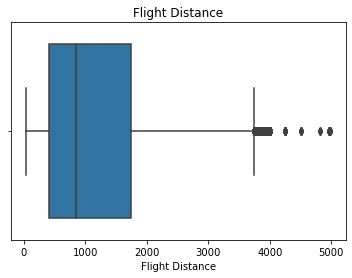

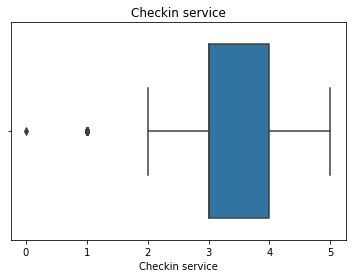

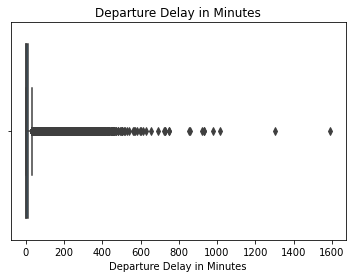

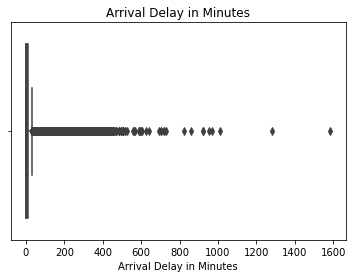

In [44]:
for i in outlier_cols:
    sns.boxplot(df[i])
    plt.title(i)
    plt.show()

## Null Imputation

In [45]:
for i in num_null_cols:
    if i in outlier_cols:
        df[i]=df[i].fillna(df[i].median())
    else:
        df[i]=df[i].fillna(df[i].mean())


#### Cross-verifying- Null values

In [46]:
for i in num_null_cols:
    print(df[i].isnull().sum())

0


## Outlier Imputation

In [47]:
for i in outlier_cols:
    iqr=df[i].quantile(0.75)-df[i].quantile(0.25)
    lower_range=df[i].quantile(0.25)-(1.5*iqr)
    higher_range=df[i].quantile(0.75)+(1.5*iqr)
    replace_higher_value=df[i].quantile(0.9)
    replace_lower_value=df[i].quantile(0.1)
    outliers_treated=np.where(df[i]>higher_range,replace_higher_value,df[i])
    df[i]=pd.DataFrame(outliers_treated)
    outliers_treated=np.where(df[i]<lower_range,replace_lower_value,df[i])
    df[i]=pd.DataFrame(outliers_treated)        

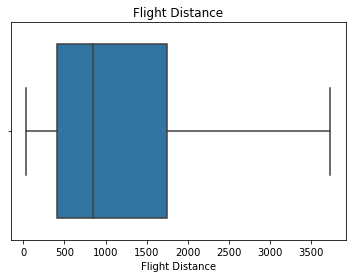

----------------------------------------------------------


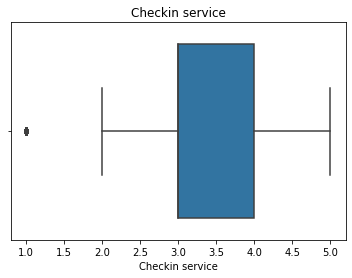

----------------------------------------------------------


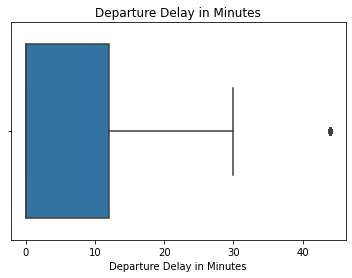

----------------------------------------------------------


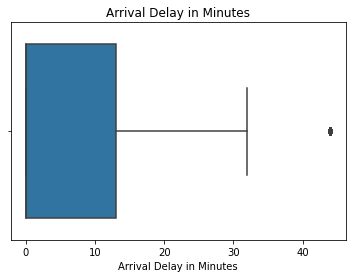

----------------------------------------------------------


In [48]:
for i in outlier_cols:
    sns.boxplot(df[i])
    plt.title(i)
    plt.show()
    print('----------------------------------------------------------')

#### Cross-verifying- Outliers

In [49]:
for i in outlier_cols:
    iqr=df[i].quantile(0.75)-df[i].quantile(0.25)
    lower_range=df[i].quantile(0.1)-(1.5*iqr)
    higher_range=df[i].quantile(0.9)+(1.5*iqr)
    if df[i][df[i]<lower_range].count()>0 or df[i][df[i]>higher_range].count()>0:
        print(i,True)
    else:
        print(i,False)

Flight Distance False
Checkin service False
Departure Delay in Minutes False
Arrival Delay in Minutes False


## Univariate Analysis

Column Name: Gender
value_counts: Female    52727
Male      51177
Name: Gender, dtype: int64
no. of unique values: 2


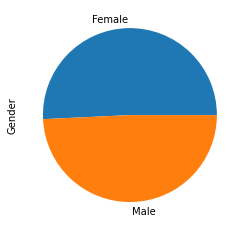

---------------------------------------------
Column Name: Customer Type
value_counts: Loyal Customer       84923
disloyal Customer    18981
Name: Customer Type, dtype: int64
no. of unique values: 2


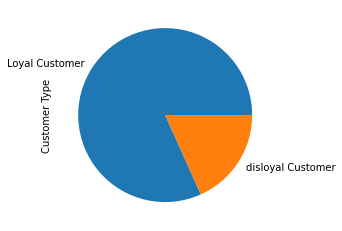

---------------------------------------------
Column Name: Age
39    2969
25    2798
40    2574
44    2482
42    2457
41    2456
22    2351
23    2346
45    2339
47    2329
38    2321
36    2319
37    2316
43    2315
48    2309
26    2289
24    2278
49    2226
46    2209
27    2186
51    2108
50    2077
52    2059
30    2030
29    1932
35    1923
53    1904
55    1866
54    1862
57    1859
56    1858
33    1851
58    1766
34    1753
59    1744
60    1743
28    1707
31    1607
32    1570
20    1520
21    1507
17     984
18     978
61     906
19     904
16     899
62     843
15     818
63     761
65     742
64     718
14     707
9      692
10     683
66     679
11     678
67     660
68     648
69     646
8      640
12     635
13     633
70     617
7      562
72     201
71      94
77      87
80      78
75      61
73      51
74      47
76      45
79      42
78      33
85      17
Name: Age, dtype: int64
no. of unique values: 75


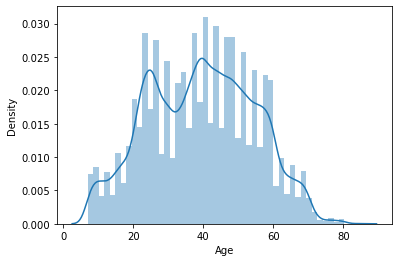

---------------------------------------------
Column Name: Type of Travel
value_counts: Business travel    71655
Personal Travel    32249
Name: Type of Travel, dtype: int64
no. of unique values: 2


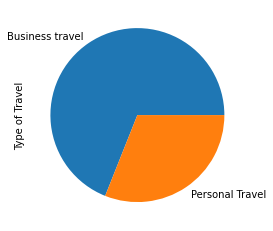

---------------------------------------------
Column Name: Class
value_counts: Business    49665
Eco         46745
Eco Plus     7494
Name: Class, dtype: int64
no. of unique values: 3


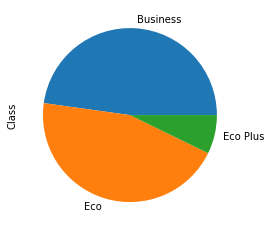

---------------------------------------------
Column Name: Flight Distance
2750.0    2296
337.0      660
594.0      395
404.0      392
2475.0     369
          ... 
1181.0       1
1116.0       1
1485.0       1
1343.0       1
1479.0       1
Name: Flight Distance, Length: 3533, dtype: int64
no. of unique values: 3533


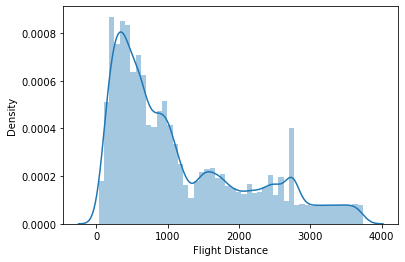

---------------------------------------------
Column Name: Inflight wifi service
3    25868
2    25830
4    19794
1    17840
5    11469
0     3103
Name: Inflight wifi service, dtype: int64
no. of unique values: 6


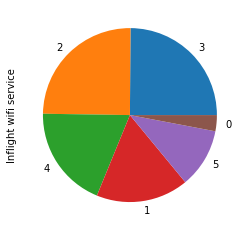

---------------------------------------------
Column Name: Departure/Arrival time convenient
4    25546
5    22403
3    17966
2    17191
1    15498
0     5300
Name: Departure/Arrival time convenient, dtype: int64
no. of unique values: 6


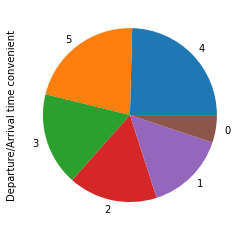

---------------------------------------------
Column Name: Ease of Online booking
3    24449
2    24021
4    19571
1    17525
5    13851
0     4487
Name: Ease of Online booking, dtype: int64
no. of unique values: 6


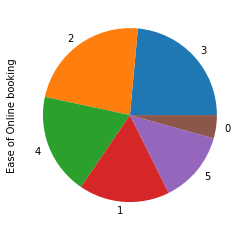

---------------------------------------------
Column Name: Gate location
3    28577
4    24426
2    19459
1    17562
5    13879
0        1
Name: Gate location, dtype: int64
no. of unique values: 6


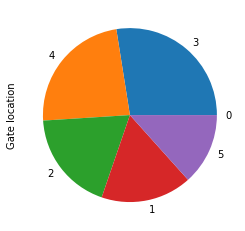

---------------------------------------------
Column Name: Food and drink
4    24359
5    22313
3    22300
2    21988
1    12837
0      107
Name: Food and drink, dtype: int64
no. of unique values: 6


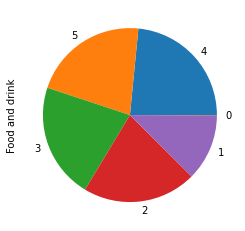

---------------------------------------------
Column Name: Online boarding
4    30762
3    21804
5    20713
2    17505
1    10692
0     2428
Name: Online boarding, dtype: int64
no. of unique values: 6


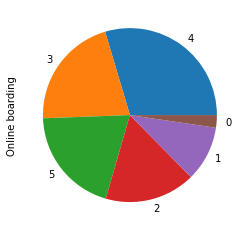

---------------------------------------------
Column Name: Seat comfort
4    31765
5    26470
3    18696
2    14897
1    12075
0        1
Name: Seat comfort, dtype: int64
no. of unique values: 6


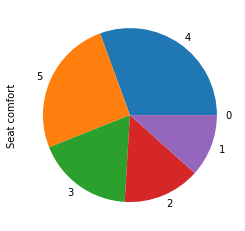

---------------------------------------------
Column Name: Inflight entertainment
4    29423
5    25213
3    19139
2    17637
1    12478
0       14
Name: Inflight entertainment, dtype: int64
no. of unique values: 6


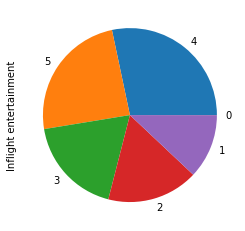

---------------------------------------------
Column Name: On-board service
4    30867
5    23648
3    22833
2    14681
1    11872
0        3
Name: On-board service, dtype: int64
no. of unique values: 6


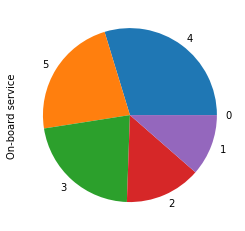

---------------------------------------------
Column Name: Leg room service
4    28789
5    24667
3    20098
2    19525
1    10353
0      472
Name: Leg room service, dtype: int64
no. of unique values: 6


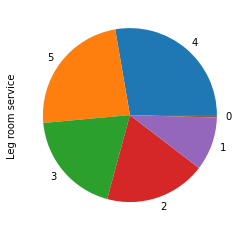

---------------------------------------------
Column Name: Baggage handling
value_counts: 4    37383
5    27131
3    20632
2    11521
1     7237
Name: Baggage handling, dtype: int64
no. of unique values: 5


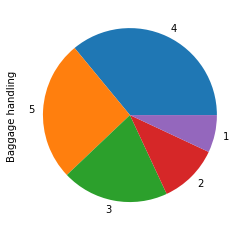

---------------------------------------------
Column Name: Checkin service
value_counts: 4.0    29055
3.0    28446
5.0    20619
2.0    12893
1.0    12891
Name: Checkin service, dtype: int64
no. of unique values: 5


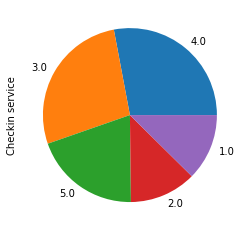

---------------------------------------------
Column Name: Inflight service
4    37945
5    27116
3    20299
2    11457
1     7084
0        3
Name: Inflight service, dtype: int64
no. of unique values: 6


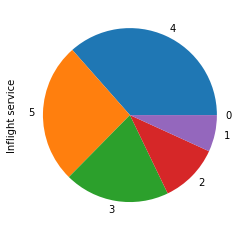

---------------------------------------------
Column Name: Cleanliness
4    27179
3    24574
5    22689
2    16132
1    13318
0       12
Name: Cleanliness, dtype: int64
no. of unique values: 6


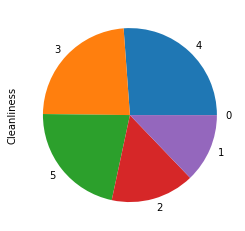

---------------------------------------------
Column Name: Departure Delay in Minutes
0.0     58668
44.0    14529
1.0      2948
2.0      2274
3.0      2009
4.0      1854
5.0      1692
6.0      1517
7.0      1392
8.0      1295
9.0      1255
10.0     1147
11.0     1061
12.0     1016
14.0      935
13.0      927
15.0      862
16.0      785
17.0      706
19.0      694
18.0      667
20.0      645
21.0      630
22.0      544
25.0      540
23.0      529
24.0      512
27.0      488
26.0      463
30.0      452
29.0      446
28.0      422
Name: Departure Delay in Minutes, dtype: int64
no. of unique values: 32


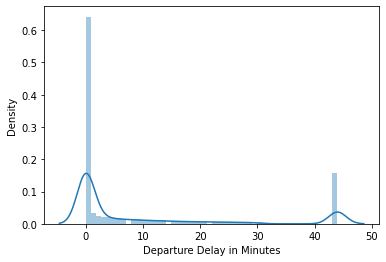

---------------------------------------------
Column Name: Arrival Delay in Minutes
0.0     58469
44.0    13954
1.0      2211
2.0      2064
3.0      1952
4.0      1907
5.0      1658
6.0      1616
7.0      1481
8.0      1394
9.0      1264
10.0     1181
11.0     1129
12.0     1070
13.0     1058
14.0      954
15.0      861
16.0      836
17.0      831
18.0      742
19.0      699
21.0      650
20.0      645
24.0      582
22.0      576
23.0      575
26.0      524
27.0      508
25.0      505
30.0      445
28.0      439
29.0      416
31.0      357
32.0      351
Name: Arrival Delay in Minutes, dtype: int64
no. of unique values: 34


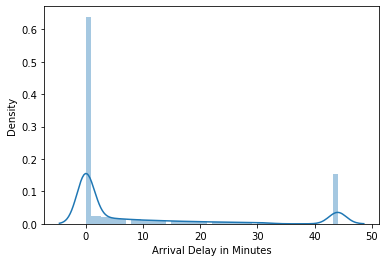

---------------------------------------------
Column Name: satisfaction
value_counts: neutral or dissatisfied    58879
satisfied                  45025
Name: satisfaction, dtype: int64
no. of unique values: 2


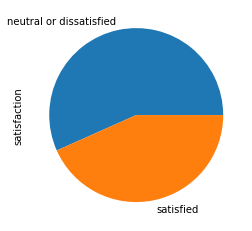

---------------------------------------------


In [50]:
for i in df.columns.tolist():
    print('Column Name:',i)
    if df[i].nunique()<6:
        print('value_counts:',df[i].value_counts())
    else:
        print(df[i].value_counts())
    print('no. of unique values:',df[i].nunique())
    if df[i].nunique() <= 6:
        df[i].value_counts().plot(kind='pie')
        plt.show()
        
    else:
        sns.distplot(df[i])
        plt.show()
    print('---------------------------------------------')

## Error: value_counts()[:5] 
Key error: 5

## Bivarient Analysis

<AxesSubplot:>

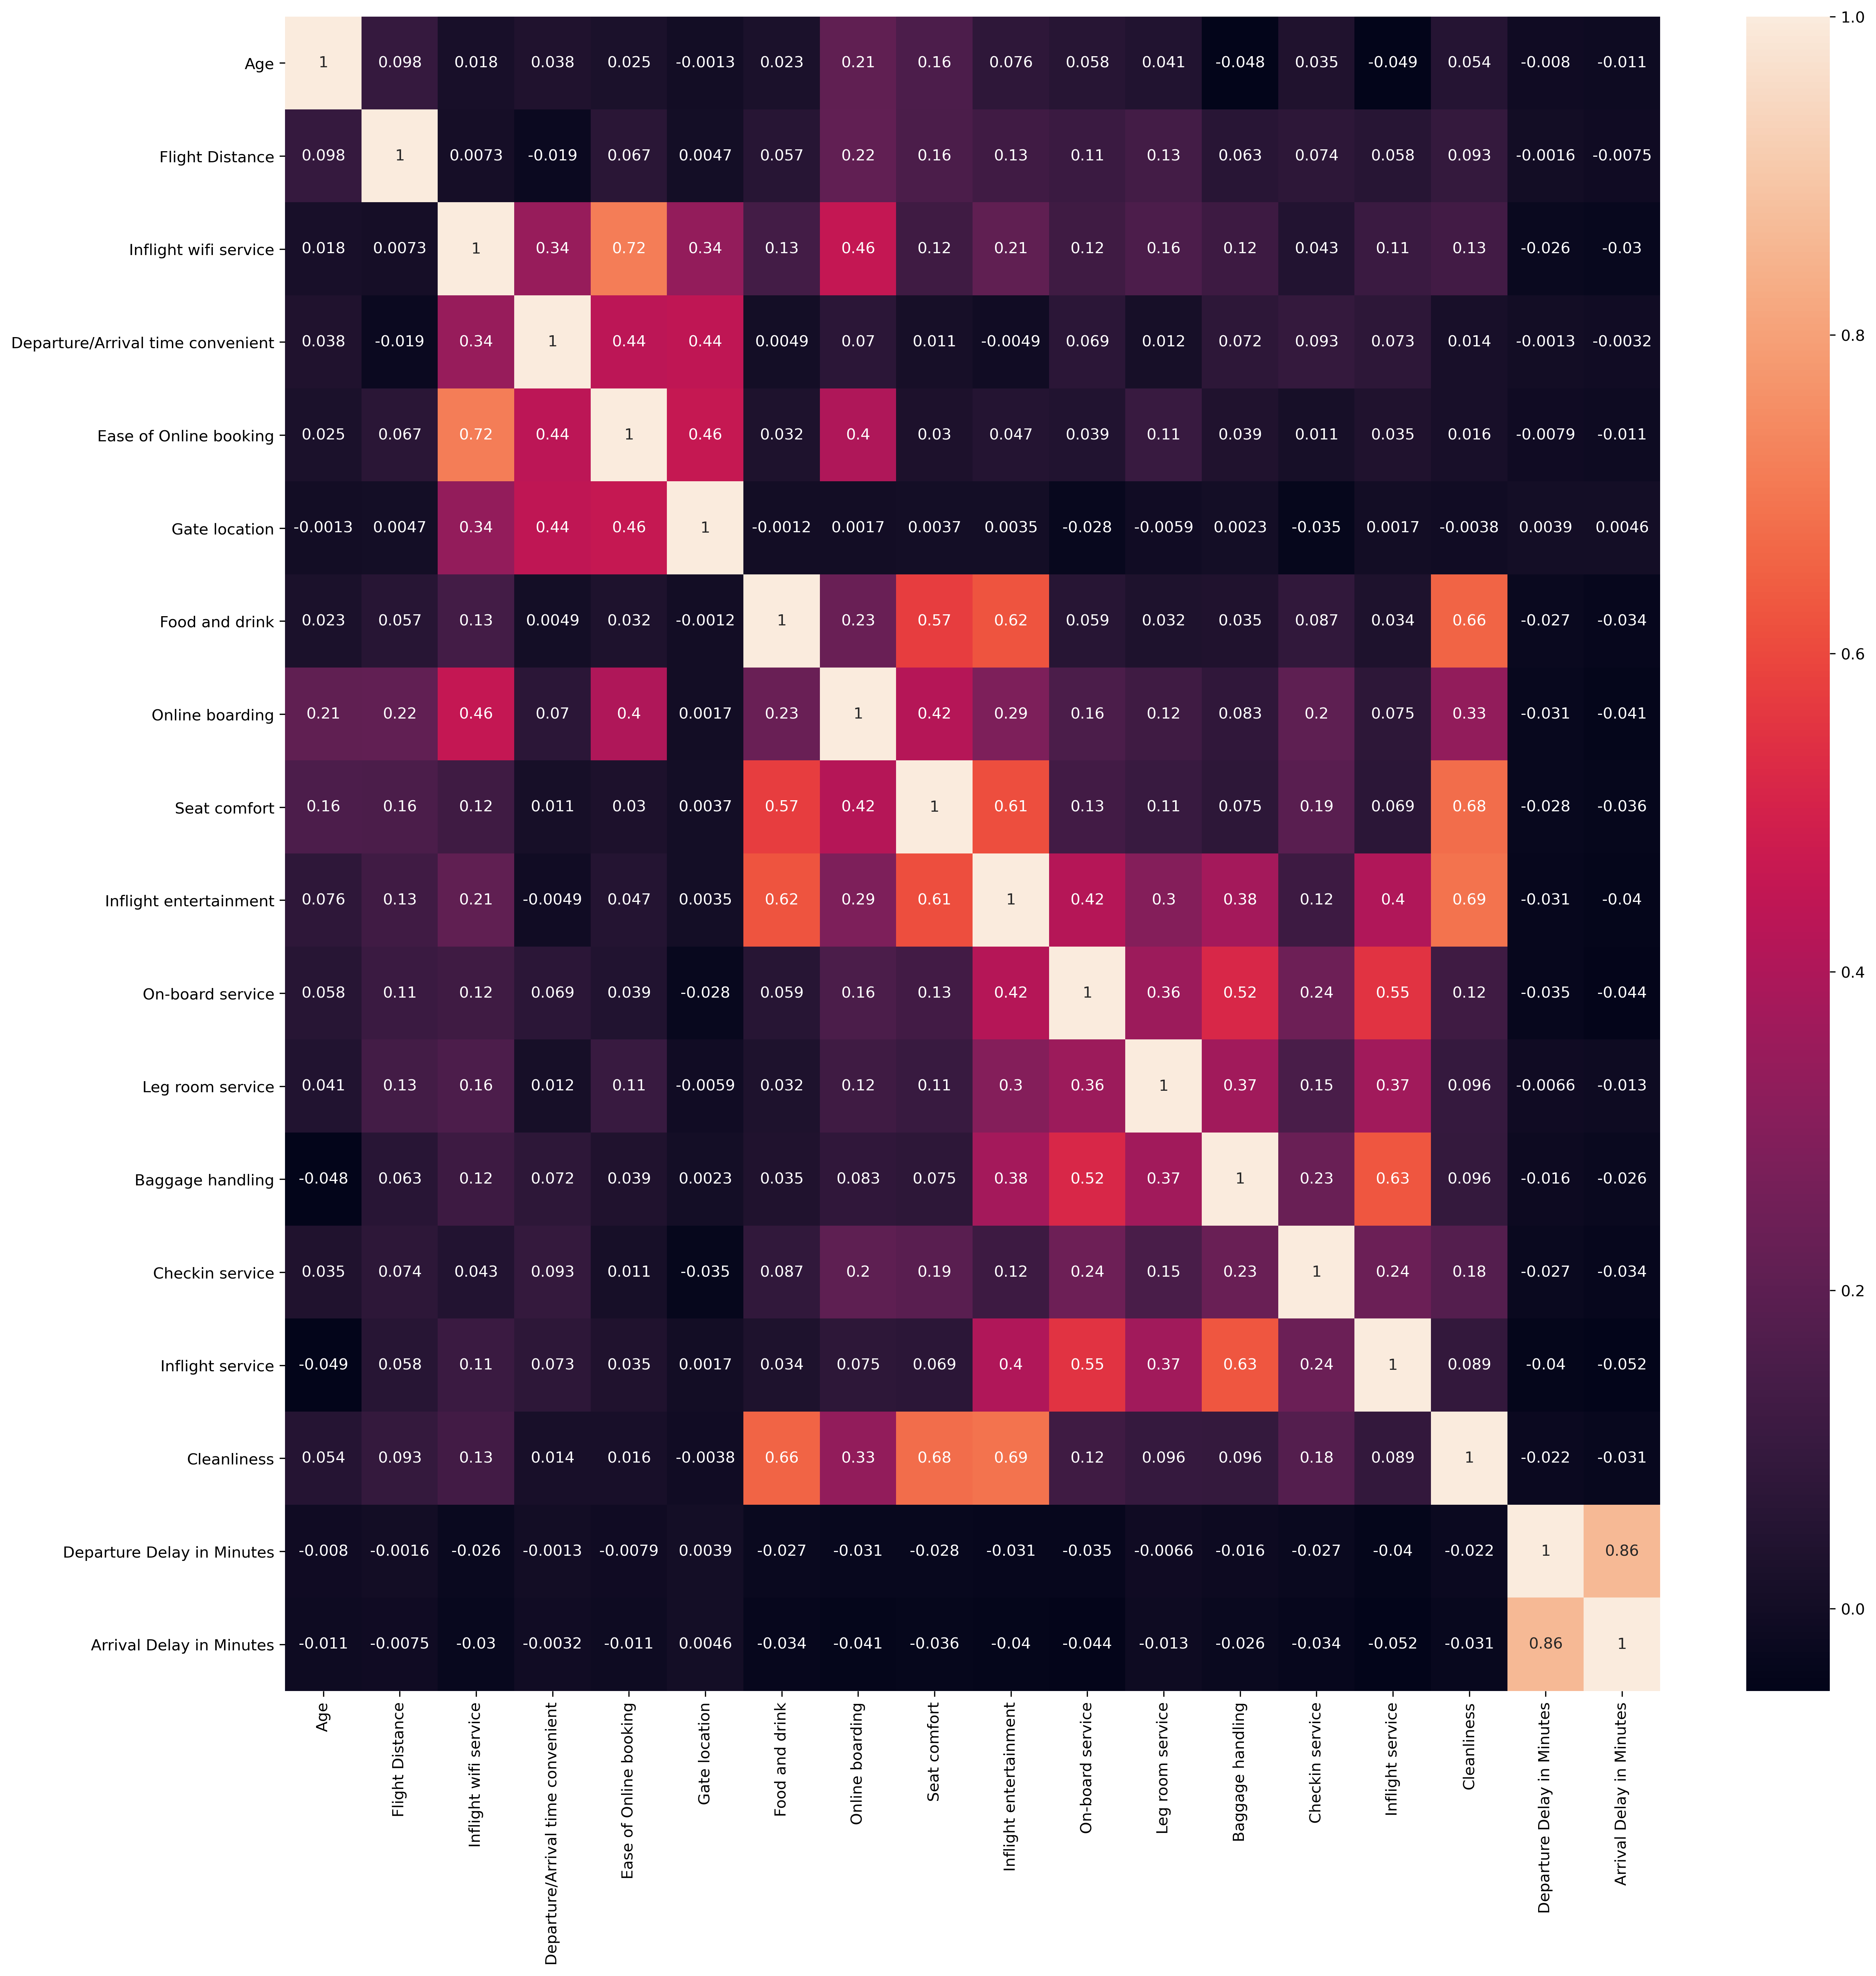

In [51]:
plt.figure(dpi=300,figsize=(20,20))
sns.heatmap(df.corr(),annot=True)

In [52]:
correlation=[]
for i in df.select_dtypes(include=['int64','float64']).columns:
    for j in df.select_dtypes(include=['int64','float64']).columns:        
        corr=np.corrcoef(df[i].values,df[j].values)[0][1]
        if not 0.9<corr<=1:
            if corr>0.5:
                correlation.append([i,j])

In [53]:
len(correlation)

22

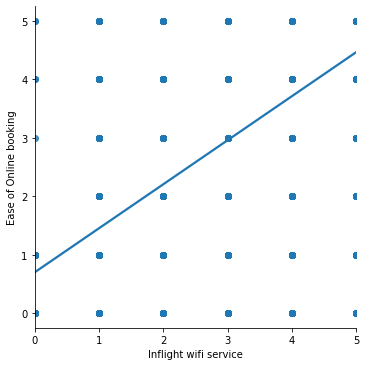

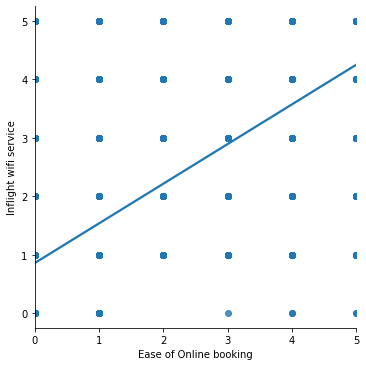

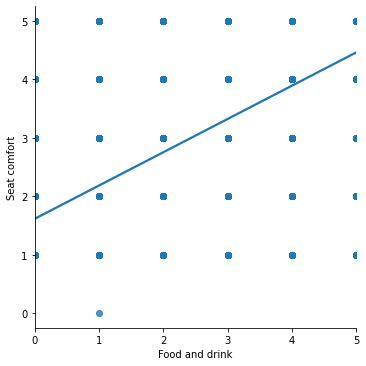

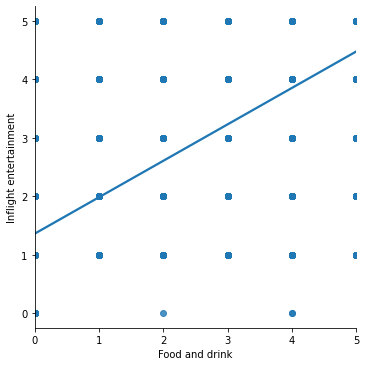

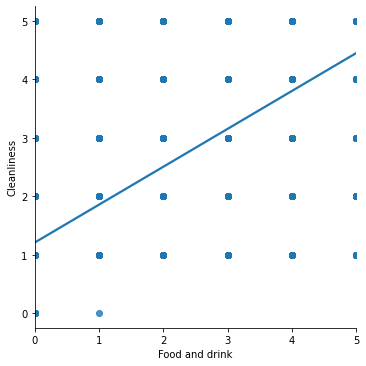

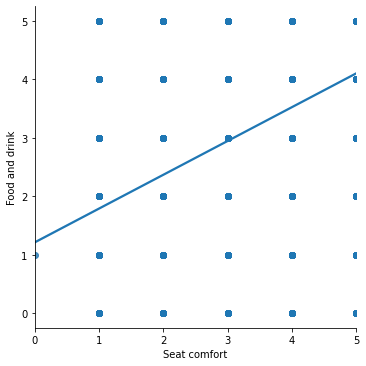

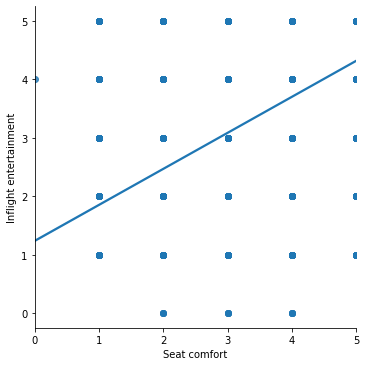

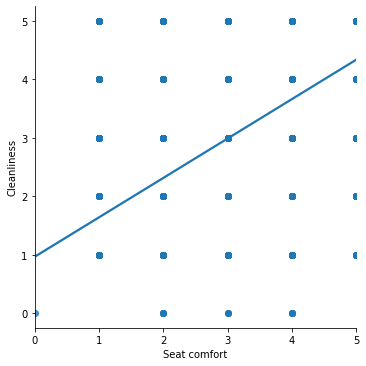

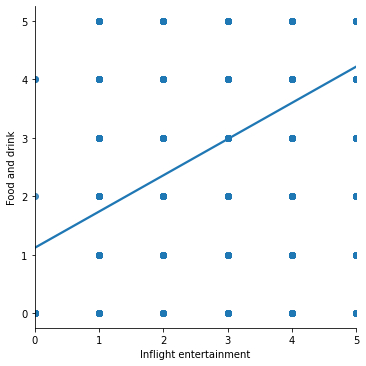

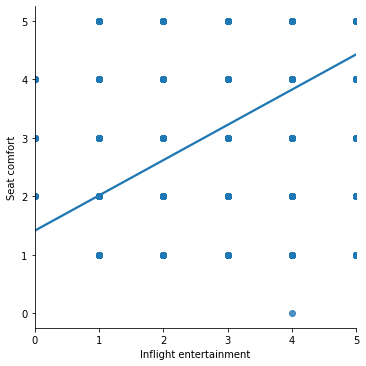

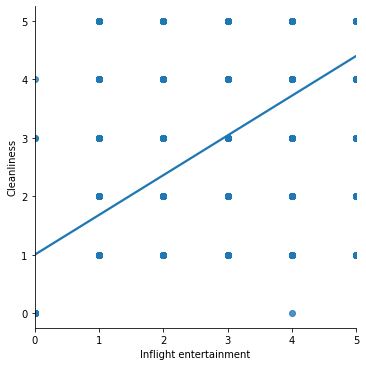

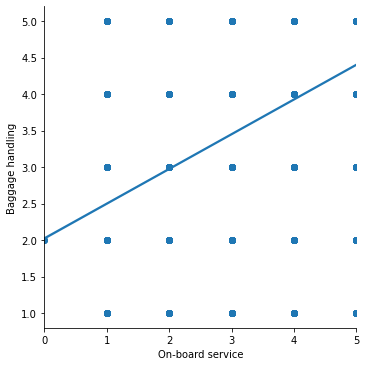

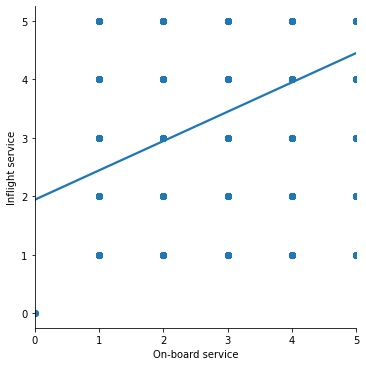

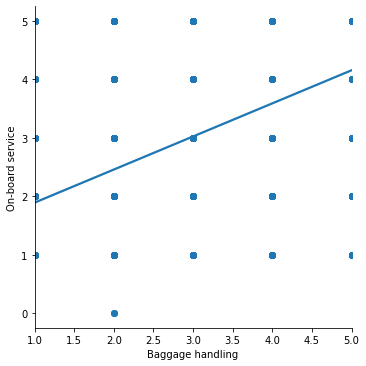

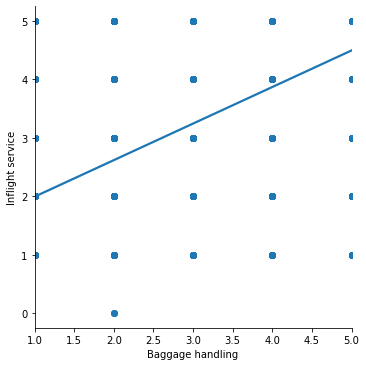

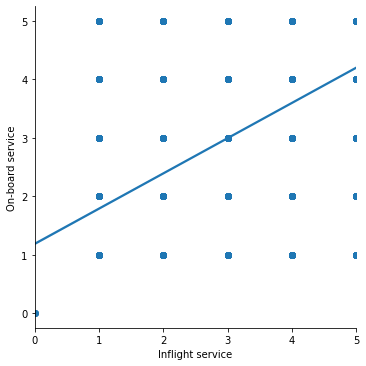

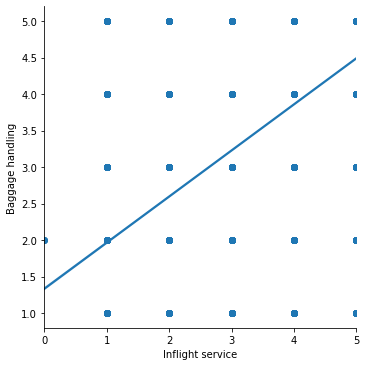

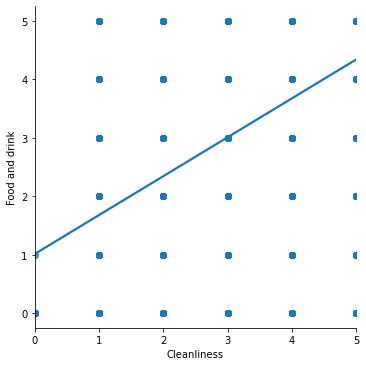

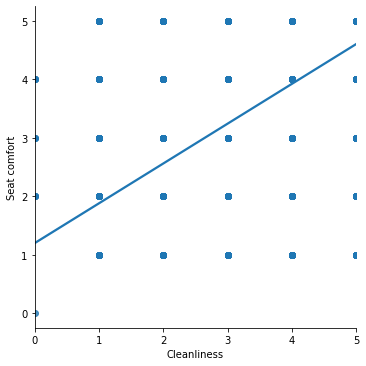

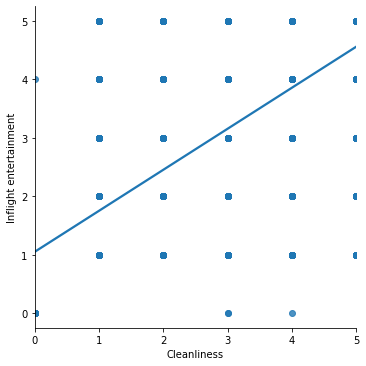

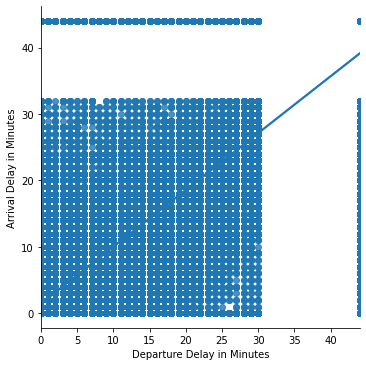

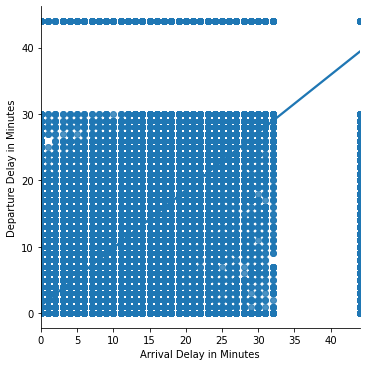

In [54]:
for i in correlation:
    sns.lmplot(i[0],i[1],data=df)
    plt.show()

In [55]:
cont = []
disc = []
for i in df.columns:
    if df[i].dtype == 'int64' or df[i].dtype == 'float64':
        if df[i].nunique() < 10:
            disc.append(i)
        else:
            cont.append(i)

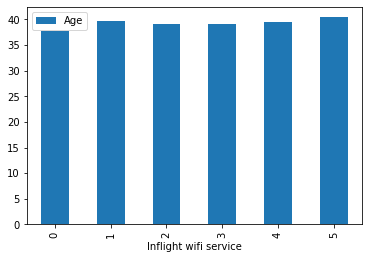

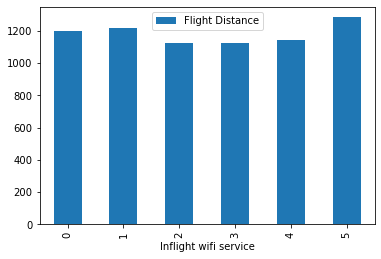

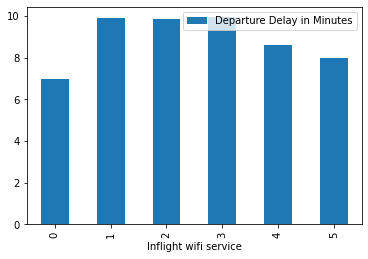

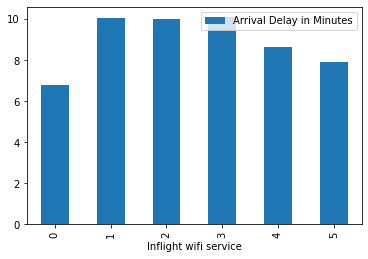

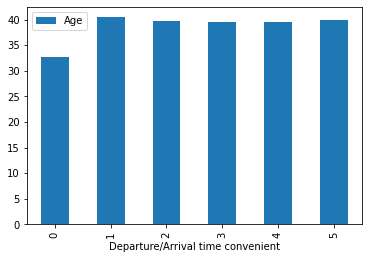

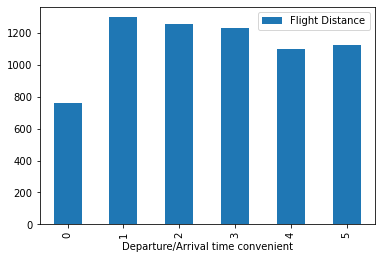

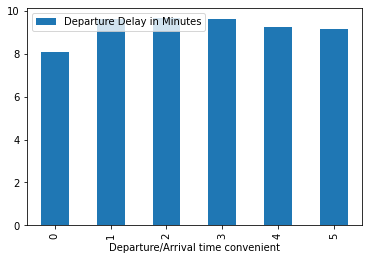

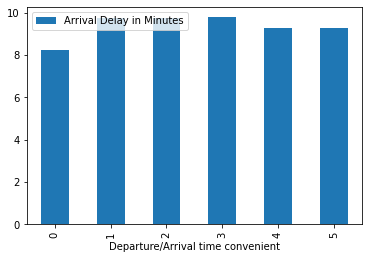

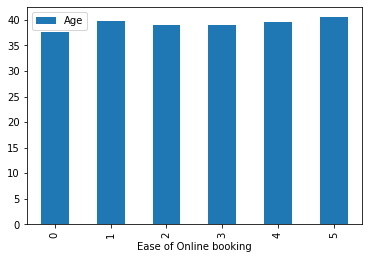

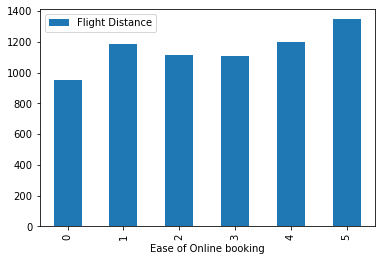

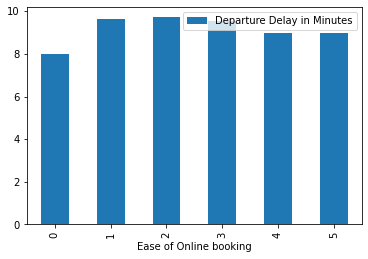

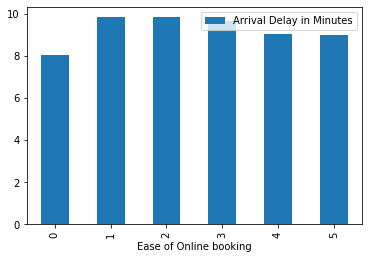

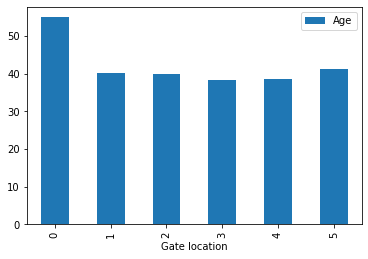

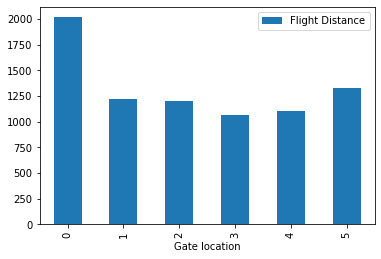

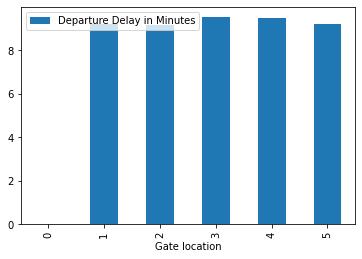

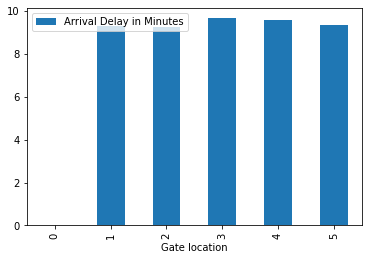

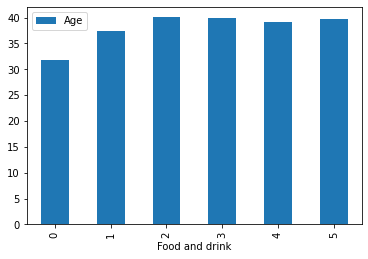

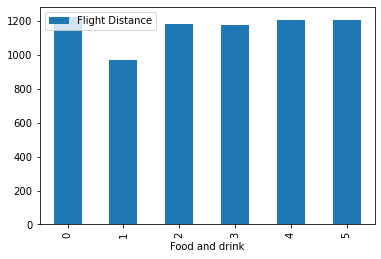

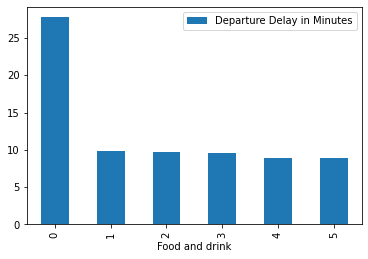

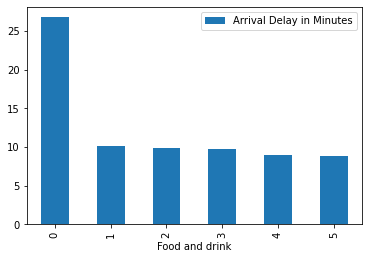

In [56]:
for i in disc[:5]:
    for j in cont[:5]:
        df.pivot_table(index=i,values=[j],aggfunc='mean').plot(kind='bar')
        plt.show()

In [57]:
df.corr()

Age  Flight Distance  \
Age                                1.000000         0.098380   
Flight Distance                    0.098380         1.000000   
Inflight wifi service              0.017859         0.007316   
Departure/Arrival time convenient  0.038125        -0.019060   
Ease of Online booking             0.024842         0.066884   
Gate location                     -0.001330         0.004693   
Food and drink                     0.023000         0.057141   
Online boarding                    0.208939         0.215369   
Seat comfort                       0.160277         0.157686   
Inflight entertainment             0.076444         0.128080   
On-board service                   0.057594         0.109840   
Leg room service                   0.040583         0.134151   
Baggage handling                  -0.047529         0.063199   
Checkin service                    0.035485         0.073728   
Inflight service                  -0.049427         0.057725   
Cleanliness                        0.053611         0.093492   
Departure Delay in Minutes        -0.007955        -0.001646   
Arrival Delay in Minutes          -0.011319        -0.007455   

                                   Inflight wifi service  \
Age                                             0.017859   
Flight Distance                                 0.007316   
Inflight wifi service                           1.000000   
Departure/Arrival time convenient               0.343845   
Ease of Online booking                          0.715856   
Gate location                                   0.336248   
Food and drink                                  0.134718   
Online boarding                                 0.456970   
Seat comfort                                    0.122658   
Inflight entertainment                          0.209321   
On-board service                                0.121500   
Leg room service                                0.160473   
Baggage handling                                0.120923   
Checkin service                                 0.043201   
Inflight service                                0.110441   
Cleanliness                                     0.132698   
Departure Delay in Minutes                     -0.026147   
Arrival Delay in Minutes                       -0.030366   

                                   Departure/Arrival time convenient  \
Age                                                         0.038125   
Flight Distance                                            -0.019060   
Inflight wifi service                                       0.343845   
Departure/Arrival time convenient                           1.000000   
Ease of Online booking                                      0.436961   
Gate location                                               0.444757   
Food and drink                                              0.004906   
Online boarding                                             0.070119   
Seat comfort                                                0.011344   
Inflight entertainment                                     -0.004861   
On-board service                                            0.068882   
Leg room service                                            0.012441   
Baggage handling                                            0.072126   
Checkin service                                             0.093344   
Inflight service                                            0.073318   
Cleanliness                                                 0.014292   
Departure Delay in Minutes                                 -0.001297   
Arrival Delay in Minutes                                   -0.003249   

                                   Ease of Online booking  Gate location  \
Age                                              0.024842      -0.001330   
Flight Distance                                  0.066884       0.004693   
Inflight wifi service                            0.715856       0.336248   
Departure

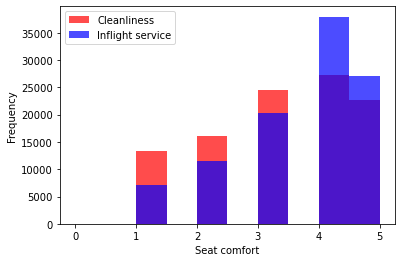

In [58]:
df.plot(x="Seat comfort", y=["Cleanliness", "Inflight service"], kind='hist',color=['red','blue'],alpha=0.7)
plt.xlabel('Seat comfort')
plt.show()

In [59]:
df['satisfaction'] = df['satisfaction'].map({'satisfied':1, 'neutral or dissatisfied': 0})

In [60]:
df[['satisfaction','Cleanliness']].value_counts()

satisfaction  Cleanliness
1             4              14550
0             3              13961
1             5              13813
0             2              12696
              4              12629
              1              10705
1             3              10613
0             5               8876
1             2               3436
              1               2613
0             0                 12
dtype: int64

In [61]:
"""df.iloc[0::10].plot(x="satisfaction", y=["Inflight entertainment", "Food and drink"], kind='bar',color=['red','yellow'],alpha=0.7)
plt.show()"""

'df.iloc[0::10].plot(x="satisfaction", y=["Inflight entertainment", "Food and drink"], kind=\'bar\',color=[\'red\',\'yellow\'],alpha=0.7)\nplt.show()'

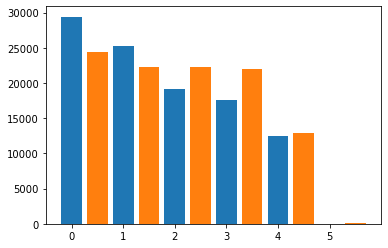

In [62]:
df[["Inflight entertainment"]].value_counts()
df[["Food and drink"]].value_counts().values
x=np.arange(6)
y1=df[["Inflight entertainment"]].value_counts().values.tolist()
y2=df[["Food and drink"]].value_counts().values.tolist()
plt.bar(x,y1,width=0.4)
plt.bar(x+0.5,y2,width=0.4)
plt.show()

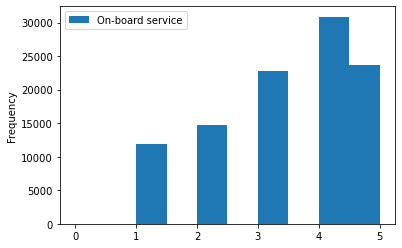

In [63]:
df.plot(x='satisfaction',y='On-board service',kind='hist')
plt.show()

In [64]:
df

Gender      Customer Type  Age   Type of Travel     Class  \
0         Male     Loyal Customer   13  Personal Travel  Eco Plus   
1         Male  disloyal Customer   25  Business travel  Business   
2       Female     Loyal Customer   26  Business travel  Business   
3       Female     Loyal Customer   25  Business travel  Business   
4         Male     Loyal Customer   61  Business travel  Business   
...        ...                ...  ...              ...       ...   
103899  Female  disloyal Customer   23  Business travel       Eco   
103900    Male     Loyal Customer   49  Business travel  Business   
103901    Male  disloyal Customer   30  Business travel  Business   
103902  Female  disloyal Customer   22  Business travel       Eco   
103903    Male     Loyal Customer   27  Business travel  Business   

        Flight Distance  Inflight wifi service  \
0                 460.0                      3   
1                 235.0                      3   
2                1142.0                      2   
3                 562.0                      2   
4                 214.0                      3   
...                 ...                    ...   
103899            192.0                      2   
103900           2347.0                      4   
103901           1995.0                      1   
103902           1000.0                      1   
103903           1723.0                      1   

        Departure/Arrival time convenient  Ease of Online booking  \
0                                       4                       3   
1                                       2                       3   
2                                       2                       2   
3                                       5                       5   
4                                       3                       3   
...                                   ...                     ...   
103899                                  1                       2   
103900                                  4                       4   
103901                                  1                       1   
103902                                  1                       1   
103903                                  3                       3   

        Gate location  Food and drink  Online boarding  Seat comfort  \
0                   1               5                3             5   
1                   3               1                3             1   
2                   2               5                5             5   
3                   5               2                2             2   
4                   3               4                5             5   
...               ...             ...              ...           ...   
103899              3               2                2             2   
103900              4               2                4             5   
103901              3               4                1             5   
103902              5               1                1             1   
103903              3               1                1             1   

        Inflight entertainment  On-board service  Leg room service  \
0                            5                 4                 3   
1                            1                 1                 5   
2                            5                 4                 3   
3                            2                 2                 5   
4                            3                 3                 4   
...                        ...               ...               ...   
103899                       2                 3                 1   
103900                       5                 5                 5   
103901                       4                 3                 2   
103902                       1                 4                 5   
103903                       1                 1                 1   

        Baggage handling  Checkin service  

In [65]:
df1=df[df['satisfaction']==1]
df0=df[df['satisfaction']==0]

In [66]:
df1

Gender   Customer Type  Age   Type of Travel     Class  \
2       Female  Loyal Customer   26  Business travel  Business   
4         Male  Loyal Customer   61  Business travel  Business   
7       Female  Loyal Customer   52  Business travel  Business   
13        Male  Loyal Customer   33  Personal Travel       Eco   
16      Female  Loyal Customer   26  Business travel  Business   
...        ...             ...  ...              ...       ...   
103890  Female  Loyal Customer   56  Business travel  Eco Plus   
103891    Male  Loyal Customer   54  Business travel  Business   
103894    Male  Loyal Customer   26  Business travel  Business   
103897  Female  Loyal Customer   60  Business travel  Business   
103900    Male  Loyal Customer   49  Business travel  Business   

        Flight Distance  Inflight wifi service  \
2                1142.0                      2   
4                 214.0                      3   
7                2035.0                      4   
13                946.0                      4   
16               2123.0                      3   
...                 ...                    ...   
103890            550.0                      3   
103891           1991.0                      5   
103894            712.0                      4   
103897           1599.0                      5   
103900           2347.0                      4   

        Departure/Arrival time convenient  Ease of Online booking  \
2                                       2                       2   
4                                       3                       3   
7                                       3                       4   
13                                      2                       4   
16                                      3                       3   
...                                   ...                     ...   
103890                                  5                       5   
103891                                  5                       5   
103894                                  4                       4   
103897                                  5                       5   
103900                                  4                       4   

        Gate location  Food and drink  Online boarding  Seat comfort  \
2                   2               5                5             5   
4                   3               4                5             5   
7                   4               5                5             5   
13                  3               4                4             4   
16                  3               4                4             4   
...               ...             ...              ...           ...   
103890              5               2                5             4   
103891              5               2                5             5   
103894              4               5                5             5   
103897              5               5                5             4   
103900              4               2                4             5   

        Inflight entertainment  On-board service  Leg room service  \
2                            5                 4                 3   
4                            3                 3                 4   
7                            5                 5                 5   
13                           4                 4                 5   
16                           4                 5                 3   
...                        ...               ...               ...   
103890                       3                 3                 3   
103891                       4                 4                 5   
103894                       5                 3                 4   
103897                       4                 4                 4   
103900                       5                 5                 5   

        Baggage handling  Checkin service  Inflight service  Cleanliness  \
2  

In [67]:
df0

Gender      Customer Type  Age   Type of Travel     Class  \
0         Male     Loyal Customer   13  Personal Travel  Eco Plus   
1         Male  disloyal Customer   25  Business travel  Business   
3       Female     Loyal Customer   25  Business travel  Business   
5       Female     Loyal Customer   26  Personal Travel       Eco   
6         Male     Loyal Customer   47  Personal Travel       Eco   
...        ...                ...  ...              ...       ...   
103898    Male     Loyal Customer   50  Personal Travel       Eco   
103899  Female  disloyal Customer   23  Business travel       Eco   
103901    Male  disloyal Customer   30  Business travel  Business   
103902  Female  disloyal Customer   22  Business travel       Eco   
103903    Male     Loyal Customer   27  Business travel  Business   

        Flight Distance  Inflight wifi service  \
0                 460.0                      3   
1                 235.0                      3   
3                 562.0                      2   
5                1180.0                      3   
6                1276.0                      2   
...                 ...                    ...   
103898           1620.0                      3   
103899            192.0                      2   
103901           1995.0                      1   
103902           1000.0                      1   
103903           1723.0                      1   

        Departure/Arrival time convenient  Ease of Online booking  \
0                                       4                       3   
1                                       2                       3   
3                                       5                       5   
5                                       4                       2   
6                                       4                       2   
...                                   ...                     ...   
103898                                  1                       3   
103899                                  1                       2   
103901                                  1                       1   
103902                                  1                       1   
103903                                  3                       3   

        Gate location  Food and drink  Online boarding  Seat comfort  \
0                   1               5                3             5   
1                   3               1                3             1   
3                   5               2                2             2   
5                   1               1                2             1   
6                   3               2                2             2   
...               ...             ...              ...           ...   
103898              4               2                3             2   
103899              3               2                2             2   
103901              3               4                1             5   
103902              5               1                1             1   
103903              3               1                1             1   

        Inflight entertainment  On-board service  Leg room service  \
0                            5                 4                 3   
1                            1                 1                 5   
3                            2                 2                 5   
5                            1                 3                 4   
6                            2                 3                 3   
...                        ...               ...               ...   
103898                       2                 4                 3   
103899                       2                 3                 1   
103901                       4                 3                 2   
103902                       1                 4                 5   
103903                       1                 1                 1   

        Baggage handling  Checkin service  

In [68]:
lst=['Departure/Arrival time convenient','Ease of Online booking','Inflight wifi service','Food and drink','Online boarding','Seat comfort','Inflight entertainment','On-board service','Leg room service','Baggage handling','Checkin service','Inflight service','Cleanliness']
for i in lst:
    print(df1[i].value_counts())
    print('^^^^^^^^1^^^^^^^^^^')
    print(df0[i].value_counts())
    print('--------------------------------------------------------')

4    9906
5    9528
3    7873
2    7657
1    7541
0    2520
Name: Departure/Arrival time convenient, dtype: int64
^^^^^^^^1^^^^^^^^^^
4    15640
5    12875
3    10093
2     9534
1     7957
0     2780
Name: Departure/Arrival time convenient, dtype: int64
--------------------------------------------------------
4    10391
5    10226
3     7537
2     7301
1     6590
0     2980
Name: Ease of Online booking, dtype: int64
^^^^^^^^1^^^^^^^^^^
3    16912
2    16720
1    10935
4     9180
5     3625
0     1507
Name: Ease of Online booking, dtype: int64
--------------------------------------------------------
4    11856
5    11363
3     6482
2     6423
1     5806
0     3095
Name: Inflight wifi service, dtype: int64
^^^^^^^^1^^^^^^^^^^
2    19407
3    19386
1    12034
4     7938
5      106
0        8
Name: Inflight wifi service, dtype: int64
--------------------------------------------------------
4    12788
5    12250
3     8839
2     8530
1     2568
0       50
Name: Food and drink, dtype: int64


### Low rating is directly impacting on the satisfaction
    Ease of Online booking
    flight wifi service
    Online boarding
    Inflight entertainment
    Leg room service

### Rating is not mattering much
    Seat comfort
    Food and drink
    On-board service
    Baggage handling
    Checkin service
    Inflight service
    Cleanliness